In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [8]:
emaildata=pd.read_csv(r"C:\Users\`sree123\Downloads\spam.csv",header=0)
emaildata_bk=emaildata.copy()
emaildata.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4843,spam,YOU HAVE WON! As a valued Vodafone customer ou...,NaN,NaN,NaN
1056,ham,Then u drive lor.,NaN,NaN,NaN
1204,spam,WIN a year supply of CDs 4 a store of ur choic...,NaN,NaN,NaN
847,ham,I am in office:)whats the matter..msg me now.i...,NaN,NaN,NaN
3932,ham,"Playin space poker, u?",NaN,NaN,NaN
3920,ham,Do 1 thing! Change that sentence into: \Becaus...,NaN,NaN,NaN
3317,ham,I'm freezing and craving ice. Fml,NaN,NaN,NaN
363,ham,Busy here. Trying to finish for new year. I am...,NaN,NaN,NaN
1961,ham,LOL that would be awesome payback.,NaN,NaN,NaN
3916,ham,Eh ur laptop got no stock lei... He say mon mu...,NaN,NaN,NaN


In [11]:
# loading the data from csv file to a pandas Dataframe
r= pd.read_csv(r"C:\Users\`sree123\Downloads\spam.csv",encoding='ISO-8859-1')

In [12]:
print(r)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham             Will Ã_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [13]:
# replace the null values with a null string
mail_data = r.where((pd.notnull(r)),'')

In [14]:
# printing the first 5 rows of the dataframe
mail_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [15]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 5)

In [17]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['v1'] == 'spam', 'v1',] = 0
mail_data.loc[mail_data['v1'] == 'ham', 'v1',] = 1

In [18]:
# separating the data as texts and label

X = mail_data['v2']

Y = mail_data['v1']

In [19]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568               Will Ã_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object


In [20]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: v1, Length: 5572, dtype: object


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [22]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# Feature Extraction

In [25]:
# transform the text data to feature vectors that can be used as input to the Logistic regression
# Create a TF-IDF vectorizer to convert text messages into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)
# Convert the training and testing text messages into numerical features using TF-IDF

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
# Convert the target values to integers (0 and 1)

Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [26]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: v2, Length: 4457, dtype: object


# Logistic Regression

In [27]:
model = LogisticRegression()

In [28]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

# Evaluating the trained model

In [29]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [30]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9661207089970832


In [31]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [32]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9623318385650225


# Building a Predictive System

In [33]:
input_mail = ["you have won a free prize, gift card, or coupon"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

Spam mail


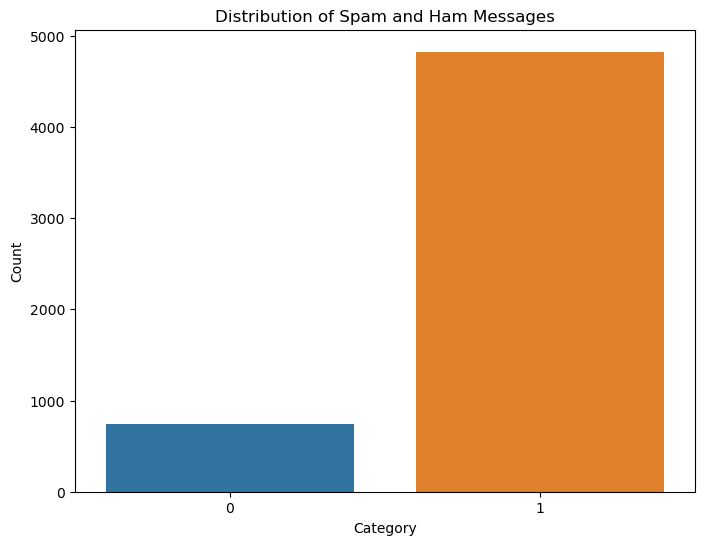

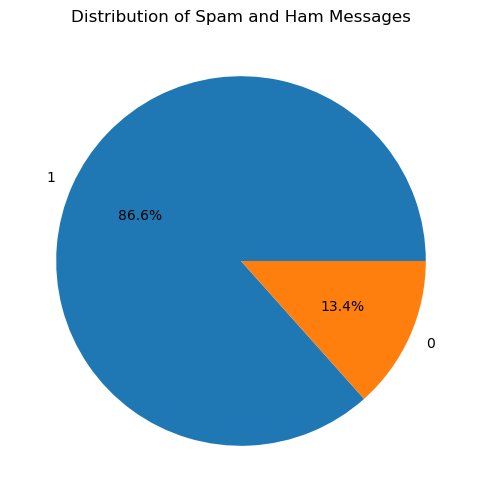

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
count = mail_data['v1'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=count.index, y=count.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(count.values, labels=count.index, autopct='%1.1f%%')
plt.title('Distribution of Spam and Ham Messages')
plt.show()

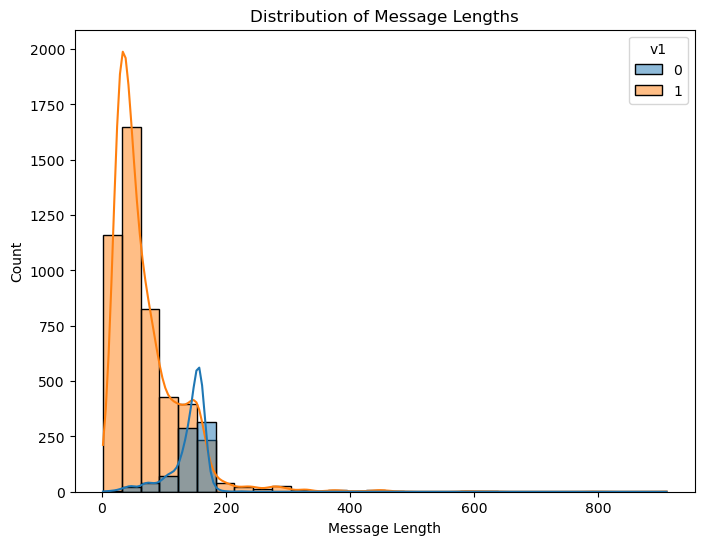

In [35]:
# Calculate the length of each message
mail_data['message_length'] = mail_data['v2'].apply(lambda x: len(x))

# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=mail_data, x='message_length', hue='v1', bins=30, kde=True)
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.title('Distribution of Message Lengths')
plt.show()